In [107]:
%matplotlib inline
import yfinance as yf
import talib
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from factors import factory as fty
from data.symbollist import CUS_SPY_SYMBOLS

[*********************100%***********************]  37 of 37 completed
                  ABB  ARKQ       AVAV  AYRO  BEEM  BLNK  BYDDY  CBAT  CIIC  \
Date                                                                          
2019-11-29  21.830000   NaN  61.340000  2.80   NaN  1.87   9.45  0.80   NaN   
2019-12-02  21.790001   NaN  63.750000  2.80   NaN  1.80   9.36  0.94   NaN   
2019-12-03  21.850000   NaN  64.610001  3.05   NaN  1.79   9.37  1.06   NaN   
2019-12-04  22.139999   NaN  61.279999  3.15   NaN  1.83   9.52  1.06   NaN   
2019-12-05  22.420000   NaN  61.590000  3.00   NaN  1.90   9.45  1.06   NaN   

            CPSH  ...   NKLA        PBW       QCLN  RIDE   RMG   SBE  SOLO  \
Date              ...                                                        
2019-11-29  1.03  ...  10.27  31.150000  22.940001  9.91  9.92  9.76  1.79   
2019-12-02  1.03  ...  10.27  30.969999  22.840000  9.91  9.94  9.76  1.77   
2019-12-03  1.04  ...  10.30  30.750000  22.809999  9.91  9.92 

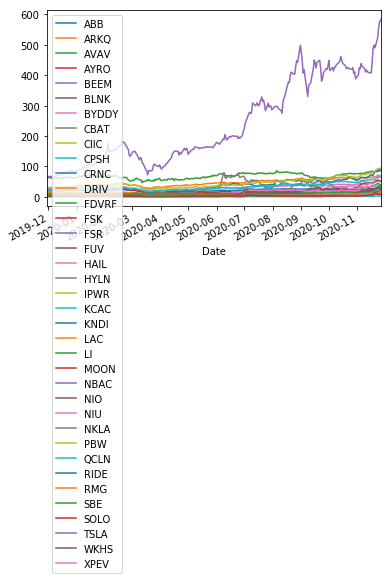

In [169]:
symbols =["NIO", "TSLA", "LI", "XPEV","CIIC","NKLA","SBE","BLNK","BYDDY","NIU",
         "SOLO","FSR","RIDE","KCAC","FUV","HYLN","WKHS","FDVRF","CRNC","LAC","DRIV",
         "RMG","AVAV","BEEM","AYRO","KNDI","NBAC","CPSH","CBAT","FSK","FUV",
         "QCLN","MOON","ARKQ","HAIL","PBW","ABB","IPWR"]

charger_symbols=["TSLA","SBE","BLNK","BYDDY","ABB","IPWR","BEEM","AVAV","POWI",
                "PLUG","FCEL"]
#symbols = charger_symbols
#symbols =CUS_SPY_SYMBOLS

data = yf.download(symbols,period='1Y',interval='1d')





df = data.copy()
print(df['Close'].head())
df['Close'].plot()

In [170]:

ret_tmp= df['Close']/df.iloc[0]['Close']-1
df = df.drop('Return', axis=1, level=0)  # drop if exist
tmp = df.xs('Close', axis=1, level=0, drop_level=False)

for symbol in tmp.columns.levels[1]:
    tmp['Close', symbol] = ret_tmp[symbol]
    

tmp = tmp.rename(columns={'Close': 'Return'})

df = df.join(tmp)


#rolling return 
look_back_window = 60
ignore_window = 7
ret_tmp = df['Close'].shift(ignore_window)/df['Close'].shift(look_back_window-ignore_window)-1
df = df.drop('RollingReturn', axis=1, level=0)  # drop if exist
tmp = df.xs('Close', axis=1, level=0, drop_level=False)
for symbol in tmp.columns.levels[1]:
    tmp['Close', symbol] = ret_tmp[symbol]

tmp = tmp.rename(columns={'Close': 'RollingReturn'})
df = df.join(tmp)
#vol 
ret_tmp= df['Close']/df['Close'].shift(1)-1
ret_tmp=ret_tmp.rolling(30).std()
df = df.drop('RollingStd', axis=1, level=0)  # drop if exist
tmp = df.xs('Close', axis=1, level=0, drop_level=False)
for symbol in tmp.columns.levels[1]:
    tmp['Close', symbol] = ret_tmp[symbol]
tmp = tmp.rename(columns={'Close': 'RollingStd'})
df = df.join(tmp)
    



/Users/ZhenxinLei/riverrocktech/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/ZhenxinLei/riverrocktech/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [171]:
retrun_df = df['RollingReturn']
std_df = df['RollingStd']
close_px = df['Return']
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig = make_subplots(rows=2,cols=1,row_heights=[0.6, 2.5])
fig.update_layout( autosize=True,xaxis_rangeslider_visible=False,width=1000, height=1000)

for symbol in retrun_df.columns:
    fig.add_trace(go.Scatter(mode='lines', x=retrun_df.index, y=retrun_df[symbol]/std_df[symbol], name=symbol, opacity=0.8,
                                 line=dict()))


for symbol in retrun_df.columns:
    fig.add_trace(go.Scatter(mode='lines', x=retrun_df.index, y=close_px[symbol], name=symbol, opacity=0.8,
                                 line=dict()),row=2, col=1)



fig.show()

In [155]:
df['RollingReturn']

,ABB,ARKQ,AVAV,AYRO,BEEM,BLNK,BYDDY,CBAT,CIIC,CPSH,...,NKLA,PBW,QCLN,RIDE,RMG,SBE,SOLO,TSLA,WKHS,XPEV
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
